In [1]:
import sys
sys.path.append(r'../')

from hao.ViT import ViT
from data.data_ISIC import ISICDataModule
import hao.utils as u
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 32, 8, 128
num_workers = 4
max_epochs = 20
use_bias = False
restart_train = True
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 128, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.0001
last_model_path = r'ViT_pth/last_model.pth'
best_model_path = r'ViT_pth/best_model.pth'
num_classes = 10

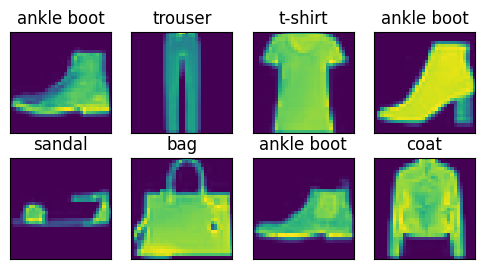

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

In [4]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [6]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.1923 val loss 0.6709 val acc 74.06%
Epoch 2 : train loss 0.6672 val loss 0.5804 val acc 78.21%
Epoch 3 : train loss 0.6001 val loss 0.5285 val acc 80.60%
Epoch 4 : train loss 0.5536 val loss 0.4982 val acc 81.69%
Epoch 5 : train loss 0.5248 val loss 0.4776 val acc 82.46%
Epoch 6 : train loss 0.5036 val loss 0.4553 val acc 83.00%
Epoch 7 : train loss 0.4848 val loss 0.4459 val acc 83.44%
Epoch 8 : train loss 0.4678 val loss 0.4390 val acc 83.86%
Epoch 9 : train loss 0.4575 val loss 0.4276 val acc 84.19%
Epoch 10: train loss 0.4485 val loss 0.4212 val acc 84.38%
Epoch 11: train loss 0.4372 val loss 0.4239 val acc 84.45%
Epoch 12: train loss 0.4301 val loss 0.4149 val acc 84.90%
Epoch 13: train loss 0.4217 val loss 0.4032 val acc 85.09%
Epoch 14: train loss 0.4141 val loss 0.4031 val acc 85.19%
Epoch 15: train loss 0.4119 val loss 0.3934 val acc 85.45%
Epoch 16: train loss 0.4026 val loss 0.3902 val acc 85.53%
Epoch 17: train loss 0.3991 val loss 0.3830 val acc 86.2